In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as ex
import seaborn as sns 

In [2]:
df=pd.read_csv('/home/faris/StackOverFlow/booking_saudi_cities_cleaned.csv')

In [3]:
#check for dublicate rows
sum(df.duplicated())


0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1389 non-null   int64  
 1   Hotel_name            1389 non-null   object 
 2   Are                   1389 non-null   object 
 3    Review               1389 non-null   float64
 4    price                1389 non-null   object 
 5   url                   1389 non-null   object 
 6   facilities            1389 non-null   object 
 7   checklist_facilities  1389 non-null   object 
 8   city                  1389 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 97.8+ KB


In [5]:
#Exloration data
print(df.shape[0])
print(df.shape[1])

1389
9


In [6]:
#check for nulls
df.isnull().sum()

Unnamed: 0              0
Hotel_name              0
Are                     0
 Review                 0
 price                  0
url                     0
facilities              0
checklist_facilities    0
city                    0
dtype: int64

In [7]:
df.head()

,Unnamed: 0,Hotel_name,Are,Review,price,url,facilities,checklist_facilities,city
0,0,Madinah Mövenpick Hotel,350 m from center,7.6,599,https://booking.com/hotel/sa/madinah-movenpick...,[],"['Pets:Pets are not allowed.:', 'Food &amp; Dr...",Madinah
1,1,Dar Al Hijra InterContinental,750 m from center,7.9,618,https://booking.com/hotel/sa/dar-al-hijra-inte...,['Family rooms'],"['Outdoors:Outdoor furniture:', 'Pets:Pets are...",Madinah
2,2,Al Madinah Harmony Hotel,750 m from center,7.2,440,https://booking.com/hotel/sa/al-madinah-harmon...,['Free WiFi'],"['Pets:Pets are not allowed.:', ""Food &amp; Dr...",Madinah
3,3,Millennium Madinah Airport,14 km from center,8.3,550,https://booking.com/hotel/sa/millennium-madina...,['Restaurant'],"['Pets:Pets are not allowed.:', 'Food &amp; Dr...",Madinah
4,4,Marina Palace Hotel,1.4 km from center,7.5,"7,935",https://booking.com/hotel/sa/marina-palace.htm...,['Non-smoking rooms'],"['Outdoors:Terrace:', 'Pets:Pets are not allow...",Madinah


In [8]:
#Make a copy
df2=df.copy()
#the first coulmn is useless
df2.drop(df.columns[0],axis=1)

,Hotel_name,Are,Review,price,url,facilities,checklist_facilities,city
0,Madinah Mövenpick Hotel,350 m from center,7.6,599,https://booking.com/hotel/sa/madinah-movenpick...,[],"['Pets:Pets are not allowed.:', 'Food &amp; Dr...",Madinah
1,Dar Al Hijra InterContinental,750 m from center,7.9,618,https://booking.com/hotel/sa/dar-al-hijra-inte...,['Family rooms'],"['Outdoors:Outdoor furniture:', 'Pets:Pets are...",Madinah
2,Al Madinah Harmony Hotel,750 m from center,7.2,440,https://booking.com/hotel/sa/al-madinah-harmon...,['Free WiFi'],"['Pets:Pets are not allowed.:', ""Food &amp; Dr...",Madinah
3,Millennium Madinah Airport,14 km from center,8.3,550,https://booking.com/hotel/sa/millennium-madina...,['Restaurant'],"['Pets:Pets are not allowed.:', 'Food &amp; Dr...",Madinah
4,Marina Palace Hotel,1.4 km from center,7.5,"7,935",https://booking.com/hotel/sa/marina-palace.htm...,['Non-smoking rooms'],"['Outdoors:Terrace:', 'Pets:Pets are not allow...",Madinah
...,...,...,...,...,...,...,...,...
1384,فندق إيلاف المشاعر مكة,700 متر من المركز,7.4,"2,400",https://booking.com/hotel/sa/elaf-al-mashaer-m...,['غرف عائلية'],"['أنشطة خارجية:مدفأة خارجية:تراس:', 'الحيوانات...",Makkah
1385,فندق سنود اجياد,1.1 كلم من المركز,8.0,899,https://booking.com/hotel/sa/snwd-jyd.ar.html?...,['غرف لغير المدخنين'],['الحيوانات الأليفة:الحيوانات الأليفة مسموح ب...,Makkah
1386,KENZI AL JEWAR HOTEL,2.8 كلم من المركز,7.3,357,https://booking.com/hotel/sa/fndq-knzy-ljwr.ar...,['مرافق لذوي الاحتياجات الخاصة'],['الحيوانات الأليفة:الحيوانات الأليفة غير مسمو...,Makkah
1387,فندق كونكورد مكة,4 كلم من المركز,7.4,300,https://booking.com/hotel/sa/concorde-makkah.a...,[],['الحيوانات الأليفة:الحيوانات الأليفة غير مسمو...,Makkah


In [9]:
# Split it by space for converting it to numeric (since the column means how hotel far from the city center)
df2["Far from city center"]= df2["Are"].str.split(" ", n = 1, expand = False)


In [10]:
#convert price column from string to float

df2[' price']=df2[' price'].str.replace(',','')
df2[' price']=df2[' price'].astype(float)

In [11]:
df2["facilities"]= df2["facilities"].str.split(" ", n = 1, expand = False)

In [12]:
for i in range (df2.shape[0]):
     df2["Far from city center"][i]= (df2["Far from city center"][i][0])
        


/tmp/ipykernel_1304432/3140713472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Far from city center"][i]= (df2["Far from city center"][i][0])


In [13]:
# Convert the (Far from city center) column to float
df2["Far from city center"]= pd.to_numeric( df2["Far from city center"],errors='coerce')
df2["Far from city center"]

0       350.0
1       750.0
2       750.0
3        14.0
4         1.4
        ...  
1384    700.0
1385      1.1
1386      2.8
1387      4.0
1388      1.9
Name: Far from city center, Length: 1389, dtype: float64

In [14]:
# Because there is some entries in km and some in meter, i ll make it all in km.
for i in range (df2.shape[0]):
     if df2["Far from city center"][i] >100:
            #Selected 100 because no one will write in km if it is above 100!
        df2["Far from city center"][i]= (df2["Far from city center"][i])/1000
        


/tmp/ipykernel_1304432/2471152737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Far from city center"][i]= (df2["Far from city center"][i])/1000


# which cities have the most bookings in Saudi Arabia


Riyadh     509
Jeddah     349
Khobar     125
Makkah     100
Yanbu       77
Dammam      77
Taif        77
Madinah     75
Name: city, dtype: int64

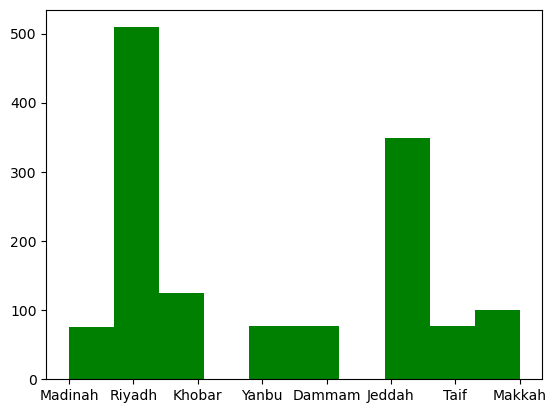

In [15]:
plt.hist(df2['city'],color='green')
df2['city'].value_counts()

In [16]:
mostbooked=df2[ (df2['city']=='Riyadh') | (df2['city']=='jeddah') ]
others=df2[ (df2['city']!='Riyadh') & (df2['city']!='jeddah') ]
#the first coulmn is useless
del mostbooked[mostbooked.columns[0]]
del others[others.columns[0]]
others

,Hotel_name,Are,Review,price,url,facilities,checklist_facilities,city,Far from city center
0,Madinah Mövenpick Hotel,350 m from center,7.6,599.0,https://booking.com/hotel/sa/madinah-movenpick...,[[]],"['Pets:Pets are not allowed.:', 'Food &amp; Dr...",Madinah,0.35
1,Dar Al Hijra InterContinental,750 m from center,7.9,618.0,https://booking.com/hotel/sa/dar-al-hijra-inte...,"[['Family, rooms']]","['Outdoors:Outdoor furniture:', 'Pets:Pets are...",Madinah,0.75
2,Al Madinah Harmony Hotel,750 m from center,7.2,440.0,https://booking.com/hotel/sa/al-madinah-harmon...,"[['Free, WiFi']]","['Pets:Pets are not allowed.:', ""Food &amp; Dr...",Madinah,0.75
3,Millennium Madinah Airport,14 km from center,8.3,550.0,https://booking.com/hotel/sa/millennium-madina...,[['Restaurant']],"['Pets:Pets are not allowed.:', 'Food &amp; Dr...",Madinah,14.00
4,Marina Palace Hotel,1.4 km from center,7.5,7935.0,https://booking.com/hotel/sa/marina-palace.htm...,"[['Non-smoking, rooms']]","['Outdoors:Terrace:', 'Pets:Pets are not allow...",Madinah,1.40
...,...,...,...,...,...,...,...,...,...
1384,فندق إيلاف المشاعر مكة,700 متر من المركز,7.4,2400.0,https://booking.com/hotel/sa/elaf-al-mashaer-m...,"[['غرف, عائلية']]","['أنشطة خارجية:مدفأة خارجية:تراس:', 'الحيوانات...",Makkah,0.70
1385,فندق سنود اجياد,1.1 كلم من المركز,8.0,899.0,https://booking.com/hotel/sa/snwd-jyd.ar.html?...,"[['غرف, لغير المدخنين']]",['الحيوانات الأليفة:الحيوانات الأليفة مسموح ب...,Makkah,1.10
1386,KENZI AL JEWAR HOTEL,2.8 كلم من المركز,7.3,357.0,https://booking.com/hotel/sa/fndq-knzy-ljwr.ar...,"[['مرافق, لذوي الاحتياجات الخاصة']]",['الحيوانات الأليفة:الحيوانات الأليفة غير مسمو...,Makkah,2.80
1387,فندق كونكورد مكة,4 كلم من المركز,7.4,300.0,https://booking.com/hotel/sa/concorde-makkah.a...,[[]],['الحيوانات الأليفة:الحيوانات الأليفة غير مسمو...,Makkah,4.00


In [17]:
maxpricemost=mostbooked[' price'].max()
averagepricemost=mostbooked[' price'].mean()
minpricemost=mostbooked[' price'].min()
print(maxpricemost)
print(averagepricemost)
print(minpricemost)
maxpriceother=others[' price'].max()
averagepriceother=others[' price'].mean()
minpriceother=others[' price'].min()
print(maxpriceother)
print(averagepriceother)
print(minpriceother)

7350.0
396.5992141453831
42.0
9999.0
456.5034090909091
40.0


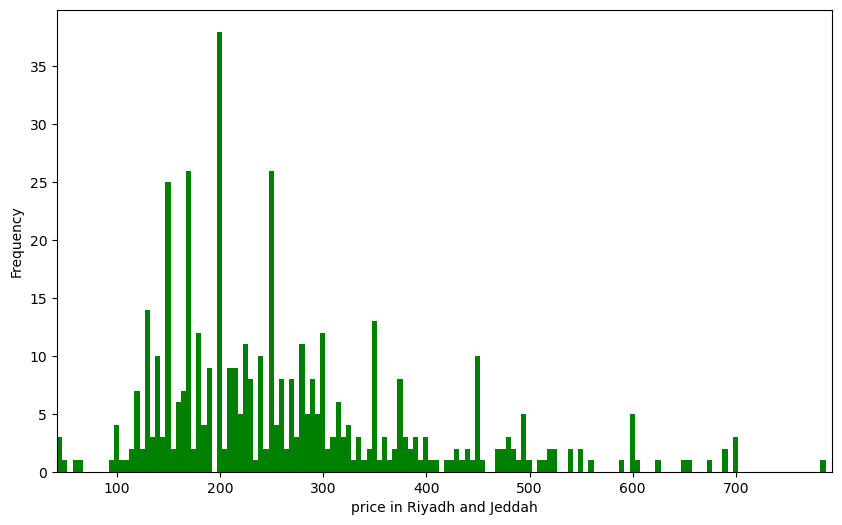

In [18]:
plt.figure(figsize=(10,6))
bin_edges = np.arange (minpricemost, mostbooked[' price'].max()+1, 5)
plt.hist(data = mostbooked, x = ' price', bins = bin_edges, color = 'green')
plt.xlim(minpricemost,averagepricemost*2)
plt.xlabel('price in Riyadh and Jeddah')
plt.ylabel('Frequency');

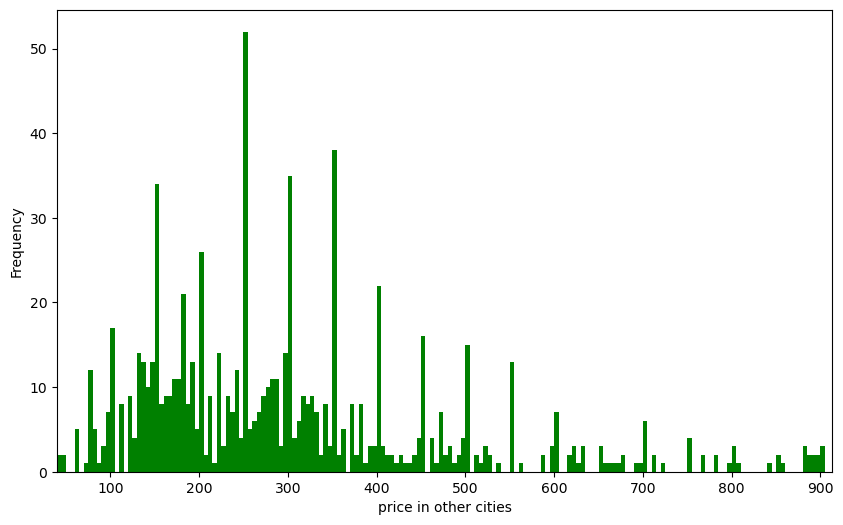

In [19]:
plt.figure(figsize=(10,6))
bin_edges = np.arange (minpriceother, others[' price'].max()+1, 5)
plt.hist(data = others, x = ' price', bins = bin_edges, color = 'green')
plt.xlim(minpriceother,averagepriceother*2)
plt.xlabel('price in other cities')
plt.ylabel('Frequency');

# Relation between price and other factors

In [35]:
mostbooked.corr().style.background_gradient(cmap="Greens")


,Review,price,Far from city center
Review,1.000000,0.336576,-0.072216
price,0.336576,1.000000,-0.023774
Far from city center,-0.072216,-0.023774,1.000000


In [36]:
others.corr().style.background_gradient(cmap="Greens")


,Review,price,Far from city center
Review,1.000000,0.069099,0.051602
price,0.069099,1.000000,0.026828
Far from city center,0.051602,0.026828,1.000000


# Is price related to review?

In [22]:
maxReviewemost=mostbooked[' Review'].max()
averageReviewemost=mostbooked[' Review'].mean()
minReviewmost=mostbooked[' Review'].min()
print(maxReviewemost)
print(averageReviewemost)
print(minReviewmost)
maxReviewother=others[' Review'].max()
averageReviewother=others[' Review'].mean()
minReviewother=others[' Review'].min()
print(maxReviewother)
print(averageReviewother)
print(minReviewother)

9.9
7.455009823182705
3.4
10.0
7.725454545454566
4.0


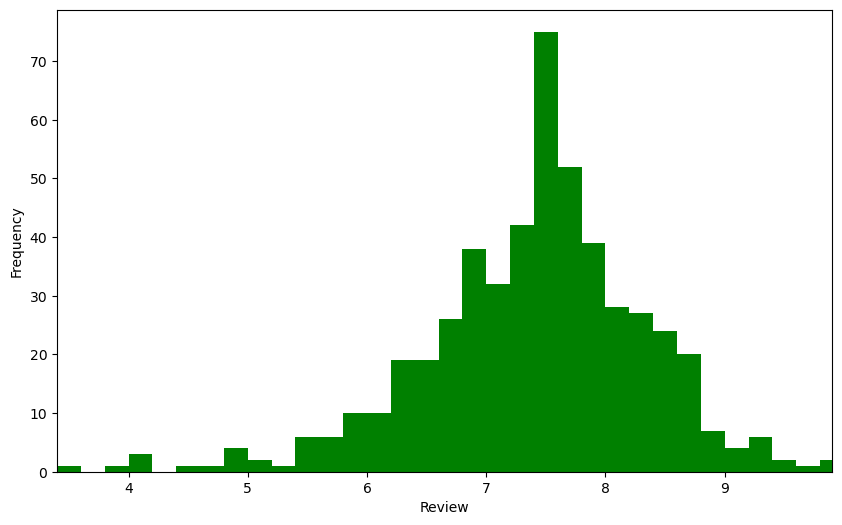

In [23]:
plt.figure(figsize=(10,6))
bin_edges = np.arange (minReviewmost, mostbooked[' Review'].max()+1, 0.2)
plt.hist(data = mostbooked, x = ' Review', bins = bin_edges, color = 'green')
plt.xlim(minReviewmost,maxReviewemost)
plt.xlabel('Review')
plt.ylabel('Frequency');

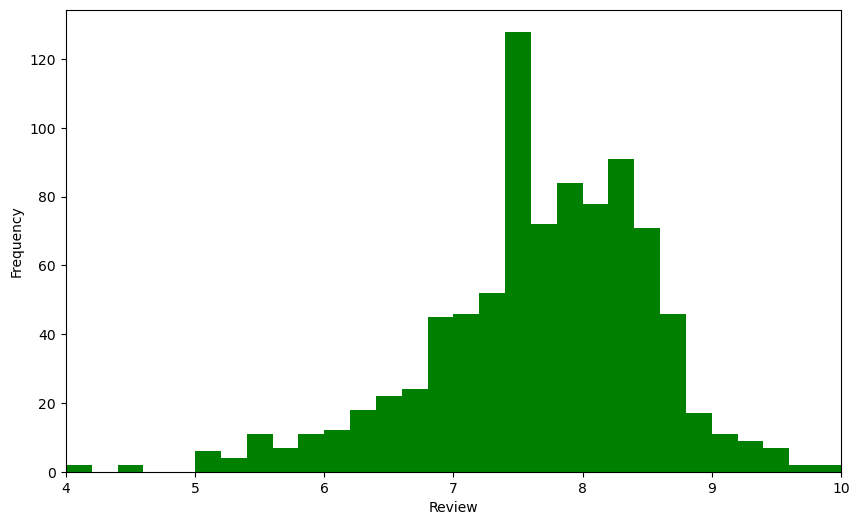

In [25]:
plt.figure(figsize=(10,6))
bin_edges = np.arange (minReviewmost, others[' Review'].max()+1, 0.2)
plt.hist(data = others, x = ' Review', bins = bin_edges, color = 'green')
plt.xlim(minReviewother,maxReviewother)
plt.xlabel('Review')
plt.ylabel('Frequency');

# What is the range of prices in saudi booking?

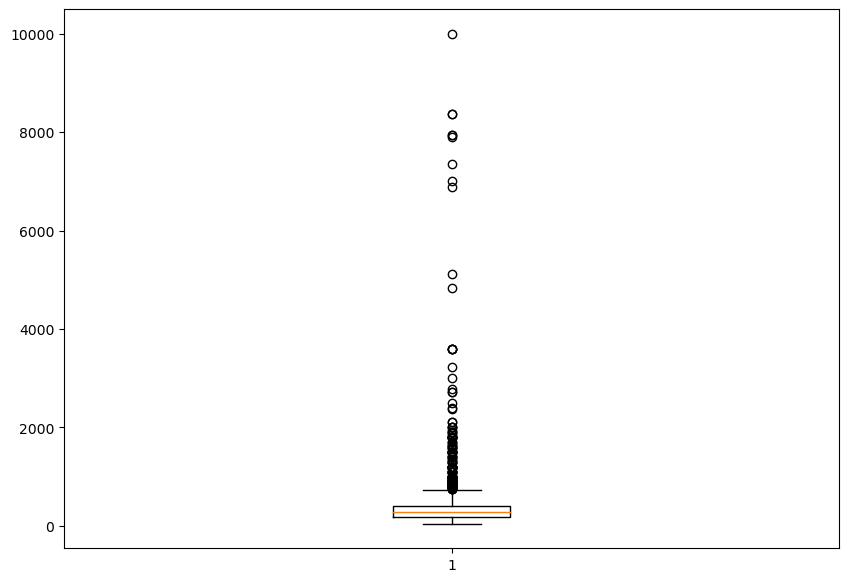

In [37]:
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(df2[' price'] )
 
plt.show()

In [28]:
#High price hotel is the hotel with price aboce 1000 Riyal (far from the box plot).
highprice=df2[df2[' price'] > 1000]
lowprice=df2[df2[' price'] < 1000]

In [29]:
# How many?
print(highprice.shape[0])#the first coulmn is useless

# Percentage?
print(highprice.shape[0]/df2.shape[0] * 100)

86
6.19150467962563


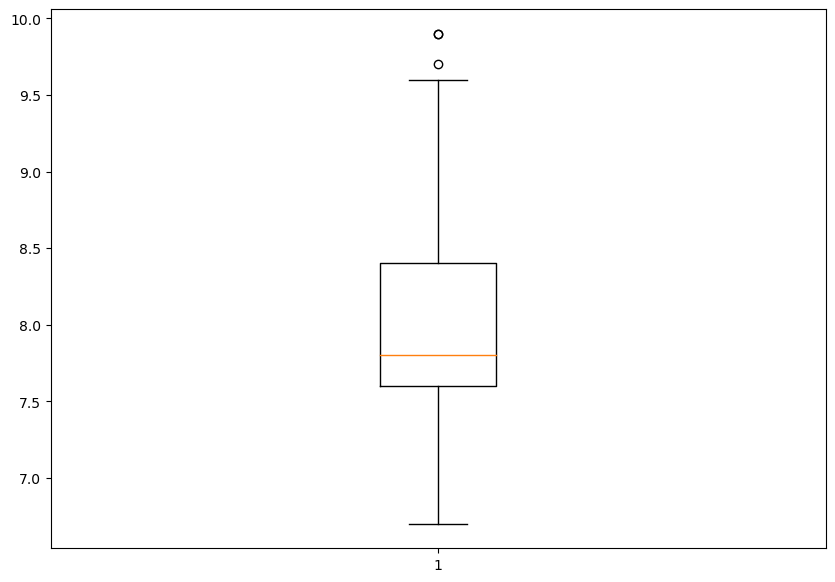

In [30]:
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(highprice[' Review'] )
 
plt.show()

# What is the difference between the most frequent facilities in high price and low price hotel?

In [46]:
print(highprice['facilities'].value_counts())
10/86 * 100

[[]]                                     15
[['واي, فاي مجاني']]                      8
[['غرف, عائلية']]                         7
[['مواقف, سيارات مجانية']]                7
[['خدمة, الغرف']]                         7
[['Free, WiFi']]                          5
[['غرف, لغير المدخنين']]                  4
[['Non-smoking, rooms']]                  3
[['مرافق, لذوي الاحتياجات الخاصة']]       3
[['Free, parking']]                       3
[['Facilities, for disabled guests']]     3
[['مسبح, واحد']]                          3
[['مركز, للياقة البدنية']]                2
[['مركز, عافية وسبا']]                    2
[['مطعم']]                                2
[['Room, service']]                       2
[['Family, rooms']]                       2
[['Parking']]                             2
[['Laundry']]                             1
[['Airport, shuttle']]                    1
[['Elevator']]                            1
[['مسبحان']]                              1
[['Airport, shuttle (free)']]   

11.627906976744185

In [47]:
print(lowprice['facilities'].value_counts())
lowprice['facilities'].shape[0]

[[]]                                     209
[['واي, فاي مجاني']]                     122
[['مواقف, سيارات مجانية']]               114
[['غرف, عائلية']]                        102
[['غرف, لغير المدخنين']]                  65
[['Non-smoking, rooms']]                  64
[['Family, rooms']]                       63
[['Free, WiFi']]                          61
[['خدمة, الغرف']]                         57
[['مرافق, لذوي الاحتياجات الخاصة']]       46
[['Free, parking']]                       40
[['Facilities, for disabled guests']]     39
[['خدمة, نقل المطار']]                    38
[['مطعم']]                                31
[['Restaurant']]                          31
[['Room, service']]                       30
[['مركز, للياقة البدنية']]                27
[['مكتب, استقبال على مدار 24 ساعة']]      26
[['مسبح, واحد']]                          21
[['24-hour, front desk']]                 20
[['Airport, shuttle']]                    12
[['Parking']]                             12
[['Elevato

1295